# Bike Sharing Assignment - Performed by Rohit Lal 

In [1]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing train_test_split and minmaxscaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# import statsmodel library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

In [3]:
# Checking head of dataframe to get idea of data columns
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking data types and missing values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Dropping Variables

We will drop irrelevant variables

- **instant** - It is unique identifier variable for each data row. It will not be relevant in our prediction, so we'll drop it.

- **dteday** - The information of `dteday` column is already conveyed by other columns, so we'll drop this column too.

- **Target variables** --
  - We have 3 variables, which signifies the target variable: `casual`, `registered`, `cnt`
  
  - And the information conveyed by `casual` & `registerd` is given by the `cnt` columns, since  `cnt = casual + registered`

  - So, we can safely drop `casual` & `registered` columns
  
  - Also, during prediction, the `casual` & `target` variable are not known, hence can't be included as the output variable and can be dropped.

In [5]:
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Data Visualization

### Checking Categorical variables

Replacing Categorical columns with their corresponding categories

#### Replacing `season` with its corresponding categories

In [6]:
season_dict = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

df.season = df.season.replace(season_dict)

#### Replacing `mnth` with its corresponding categories

In [7]:
month_dict = {k: v for k,v in enumerate(calendar.month_abbr)}

df.mnth = df.mnth.replace(month_dict)

#### Replacing `weekday` with its corresponding categories

In [8]:
weekdays_dict = {
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
}

df.weekday = df.weekday.replace(weekdays_dict)

#### Replacing `weathersit` with its corresponding categories

In [9]:
weathersit_dict = {
    1: 'clear',
    2: 'mist & cloudy',
    3: 'light snow rain',
    4: 'heavy snow rain'
}

df.weathersit = df.weathersit.replace(weathersit_dict)

Let's check the dataframe again

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


##### `yr`, `holiday`, and `workingday` are binary variables, and are not required to be replaced.

## Applying EDA on remaining variables

### Univariate Analysis - Continuous Variables

In [11]:
def boxplot_one_var(df, column_name, title):
    plt.figure(figsize=(10, 5))

    p = sns.boxplot(df[column_name])
    plt.figtext(.5,.9, title, fontsize=15, ha='center')
    p.set_xticklabels(p.get_xticks(), size = 14)

    plt.show()

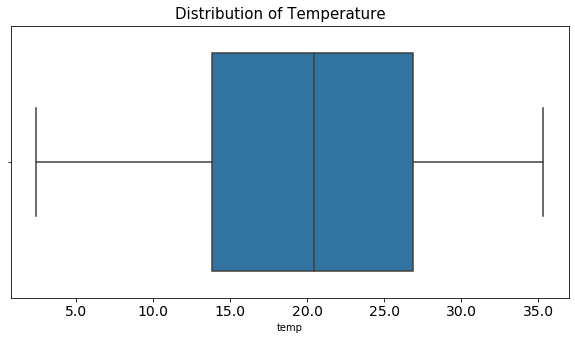

In [12]:
boxplot_one_var(df=df, column_name='temp', title='Distribution of Temperature')

- There are no outliers in the temperature column
- Temperature values ranges from somewhere around 2 degrees upto 35 degrees

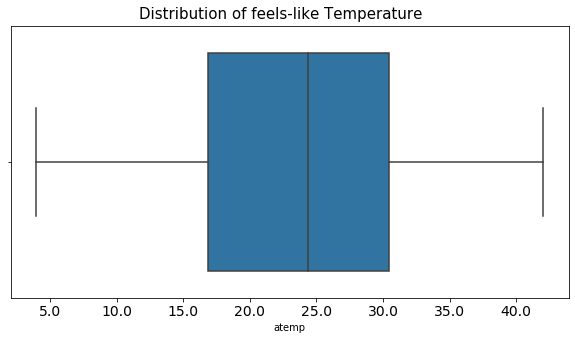

In [13]:
boxplot_one_var(df=df, column_name='atemp', title='Distribution of feels-like Temperature')

- There are no outliers in the feels-like temperature column
- Values ranges from somewhere around 3 degrees upto 42 degrees

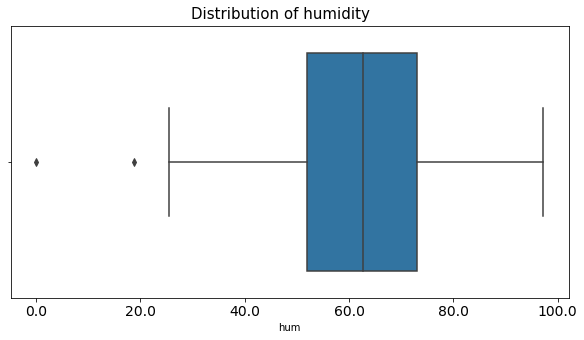

In [14]:
boxplot_one_var(df=df, column_name='hum', title='Distribution of humidity')

- The humidity column has some Outliers in the lower region.
- It signifies the very less humid environment. We won't drop the Outliers since it is based on the environment condition.

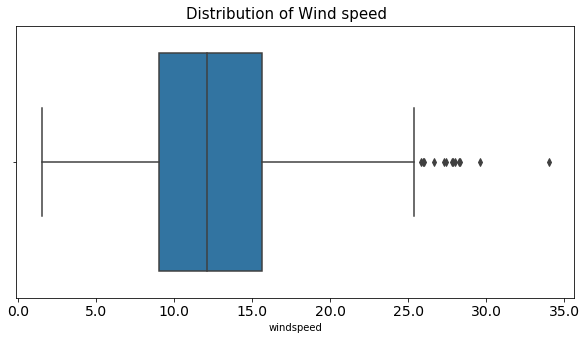

In [15]:
boxplot_one_var(df=df, column_name='windspeed', title='Distribution of Wind speed')

- The windspeed column has some Outliers in the upper region.
- It signifies the high windspeeds environment. We will not drop the Outliers since it is based on the environment condition, which can be important in our prediction.

### Bivariate Analysis -  Categorical Variables

In [16]:
def boxplot_two_var(dataframe, col1, col2, title):
    plt.figure(figsize=(10, 5))

    p = sns.boxplot(data=df, x=col1, y=col2)
    p.set_yticklabels(p.get_yticks(), size = 14)
    plt.figtext(.5,.9, title, fontsize=15, ha='center')
    plt.show()

##### Demand of bikes across different seasons

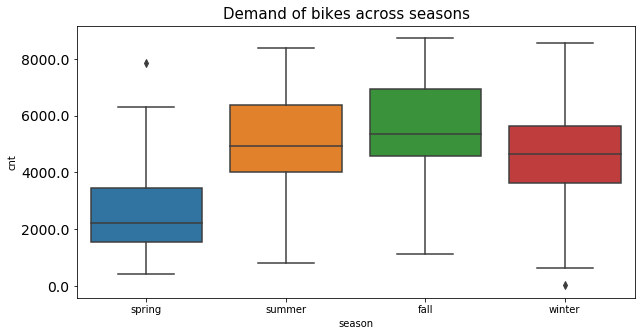

In [17]:
boxplot_two_var(dataframe=df, col1='season', col2='cnt', title='Demand of bikes across seasons')

- We can see, the `summer` & `fall` has relatively higher demands followed by `winter` & then `spring`
- `Spring` season has lowest demands

##### Demand of bikes across different months

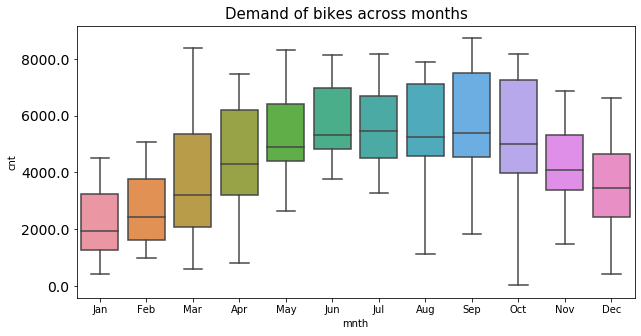

In [18]:
boxplot_two_var(dataframe=df, col1='mnth', col2='cnt', title='Demand of bikes across months')

- As per above plot, we can see that the demand increases steadily from `Mar` till `Sept`. 
- After `Sept`, there is steady decrease in demand.
- This plot also aligns with the `seasons` plot conclusion (`spring` and `winter` has lower demands)

##### Demand of bikes across both years

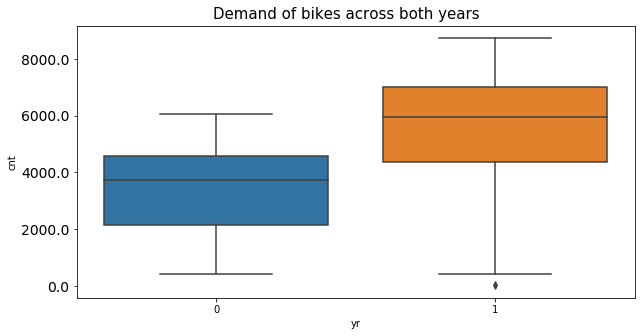

In [19]:
boxplot_two_var(dataframe=df, col1='yr', col2='cnt', title='Demand of bikes across both years')

- We can say demand is increasing year wise. Since, the next year has significant increase in demand than the previous year.

##### Demands of bikes across weekdays

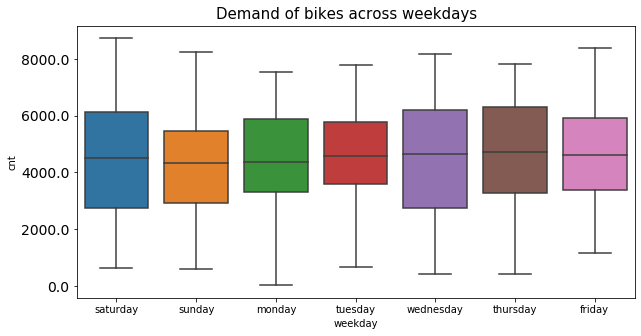

In [20]:
boxplot_two_var(dataframe=df, col1='weekday', col2='cnt', title='Demand of bikes across weekdays')

- There isn't a strong relation visible between `demand` and `weekdays`.

#####  Demands of bikes across weather

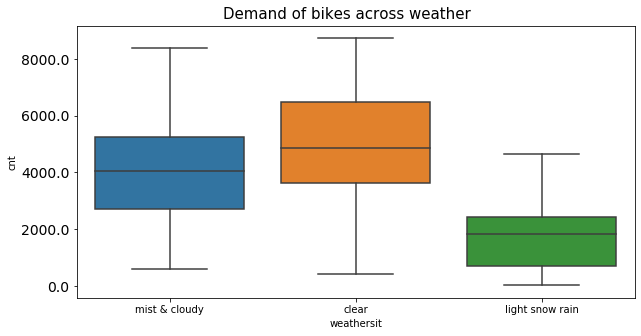

In [21]:
boxplot_two_var(dataframe=df, col1='weathersit', col2='cnt', title='Demand of bikes across weather')

- Demand in `clear` weather is highest followed by `mist & cloudy` and `light snow rain`
- `Light snow rain` has lowest demands.

##### Demand of bikes on non-holiday vs holiday

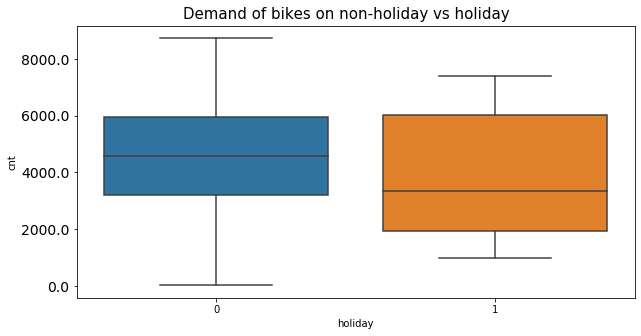

In [22]:
boxplot_two_var(dataframe=df, col1='holiday', col2='cnt', title='Demand of bikes on non-holiday vs holiday')

- The demand on `non-holiday`*(orange)* is spreaded more, i.e, more variable than the demand on a `holiday`*(blue)*
- In other words, demand on `holiday` is more consistent than the demand on `non-holiday`.

##### Demand of bikes on non-working day vs working day

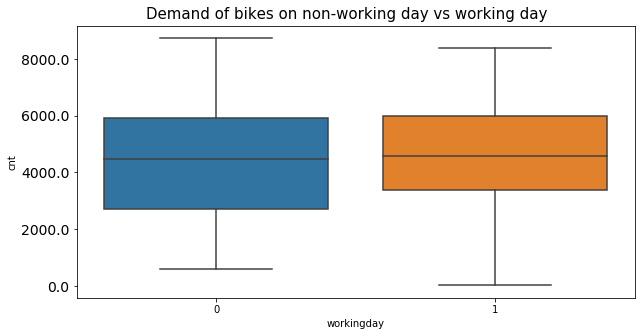

In [23]:
boxplot_two_var(dataframe=df, col1='workingday', col2='cnt', title='Demand of bikes on non-working day vs working day')

- There is no strong relationship between `demands` and `workingday`.
- The `demand` on `non-working` day is slightly more spreaded than the `workingday`.

### BiVariate Anaysis - Continuous Variable

In [24]:
def scatterplot_three_vars(df, col1, col2, col3, col1_name, col2_name, col3_name):
    plt.figure(figsize = (23, 6))

    ax = plt.subplot(1,2,1)
    p1 = sns.scatterplot(x=col1, y=col3, data=df, ax= ax)
    p1.set_xticklabels(p1.get_xticks(), size = 18)
    p1.set_yticklabels(p1.get_yticks(), size = 18)
    plt.title('{} v/s {}'.format(col3_name, col1_name))
    plt.ylabel(col3_name, fontsize=15)
    plt.xlabel(col1_name, fontsize=15)

    ax = plt.subplot(1,2,2)
    p2 = sns.scatterplot(x=col2, y=col3, data=df, ax= ax)
    p2.set_xticklabels(p2.get_xticks(), size = 18)
    p2.set_yticklabels(p2.get_yticks(), size = 18)
    plt.title('{} v/s {}'.format(col3_name, col2_name))
    plt.ylabel(col3_name, fontsize=15)
    plt.xlabel(col2_name, fontsize=15)

    plt.show()

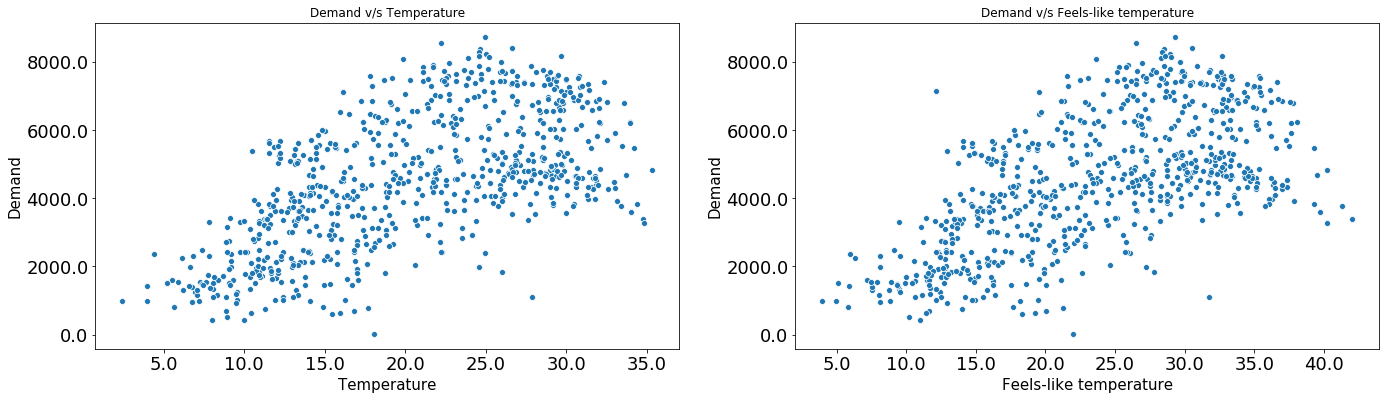

In [25]:
scatterplot_three_vars(
    df=df, col1='temp', col2='atemp', col3='cnt', 
    col1_name='Temperature', col2_name='Feels-like temperature', col3_name='Demand'
)

- Both `temperature` and `feels-like temperature` behaves quiet similar to demand.
- There is a high correlation between `temperature` and `feels-like temperature`, we will need to drop one of these columns since it will affect the model training.

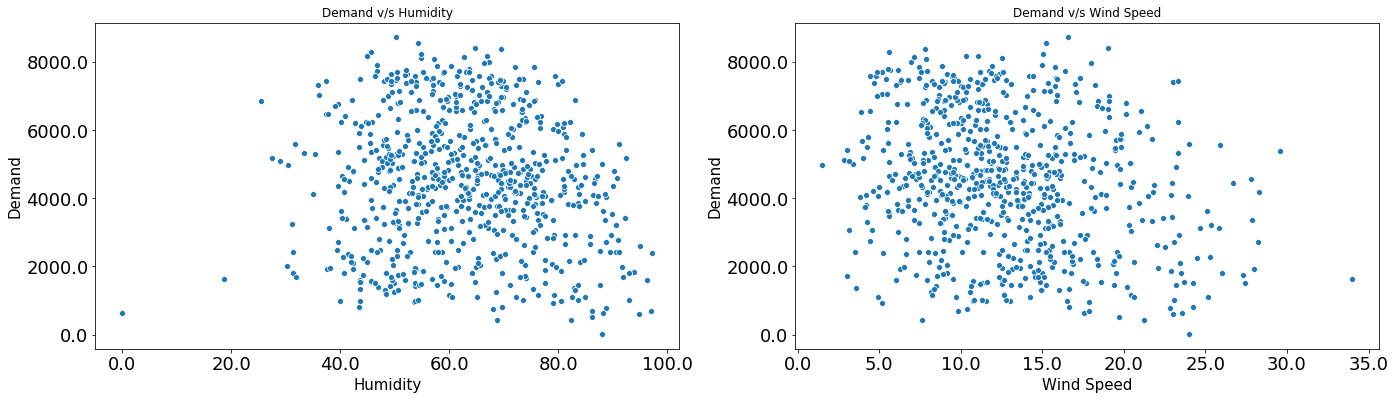

In [26]:
scatterplot_three_vars(
    df=df, col1='hum', col2='windspeed', col3='cnt', 
    col1_name='Humidity', col2_name='Wind Speed', col3_name='Demand'
)

- We can see that the `demands` are very low for lower `humidity` environment.
- As, `humidity` increases, the `demand` increases, but again on `high` humidity, the `demand` again starts to fall down.

- The `demand` decreases for high values of the `windspeed`.
- While `demand` is moderate for lower to medium `windspeeds`.

### Plotting Pairplot between Continuous Numerical variables

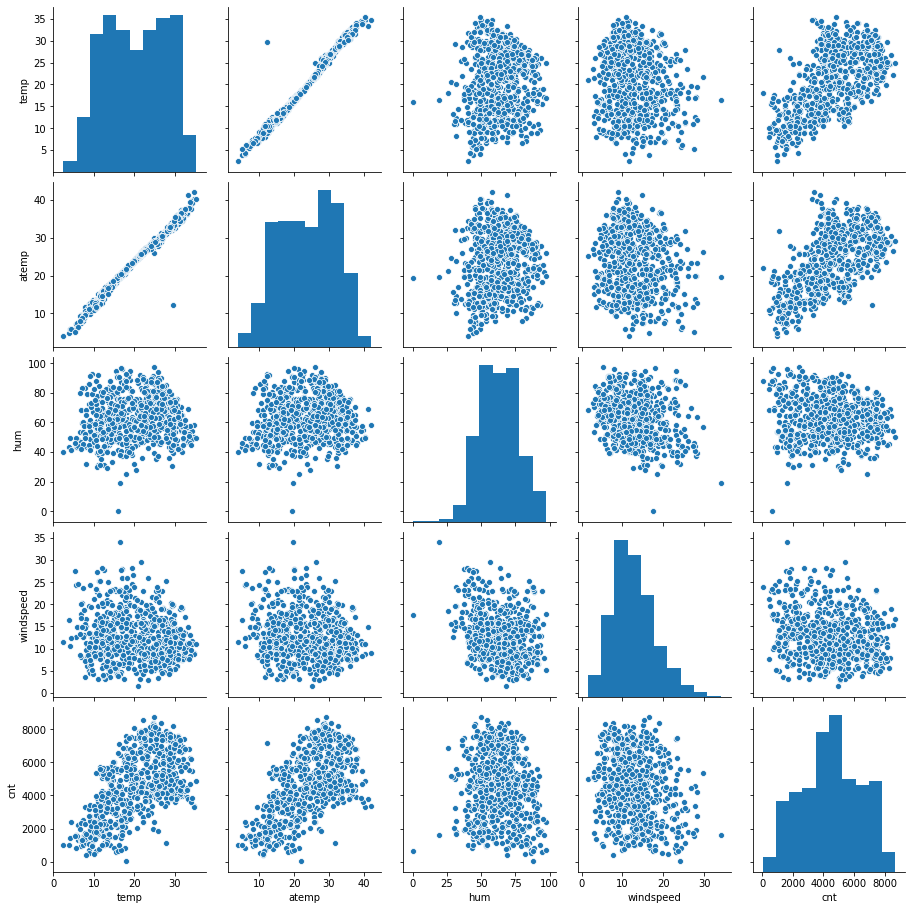

In [27]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

## Checking Correlation

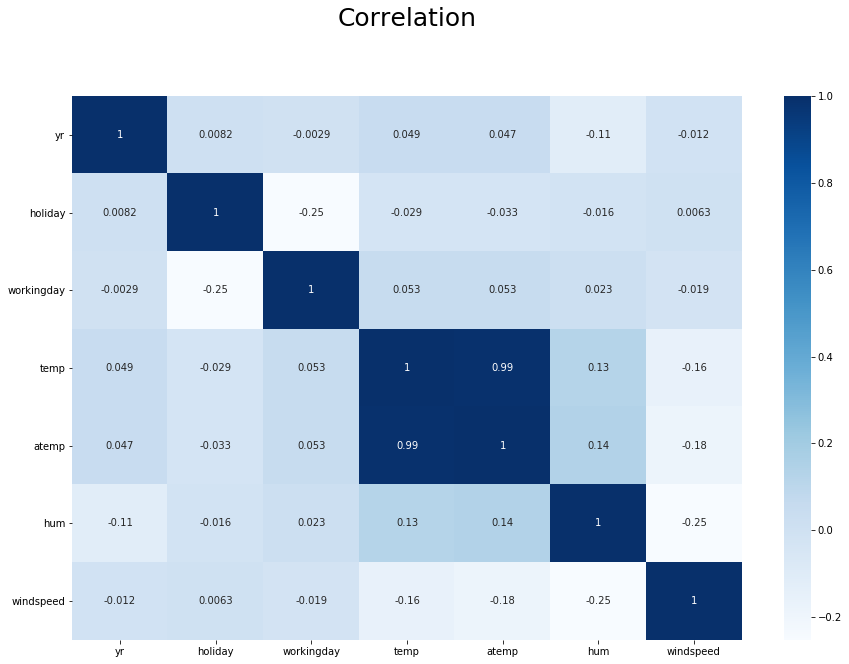

In [28]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(df.drop(columns='cnt').corr(), cmap="Blues",annot=True)
plt.title('Correlation')
plt.yticks(rotation=0)
plt.show()

- We can see `temp` & `atemp` has similar correlation values, hence have high multi-collinearity.

Multi-collinearity can affect our model performance, so we'll drop one column out of `(temp, atemp)`

In [29]:
df.drop(columns='atemp', axis=1, inplace=True)

# Data Preparation 

## Creating Dummy Variables

In [30]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,saturday,0,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,sunday,0,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


##### If we have k unique terms, we can use `k-1` dummy variables to represent it.

In [31]:
# Creating dummmy variables for season column
season_dummies = pd.get_dummies(df.season).iloc[:, 1:]

In [32]:
# Creating dummmy variables for month column
season_mnth = pd.get_dummies(df.mnth).iloc[:, 1:]

In [33]:
# Creating dummmy variables for weekday column
season_weekday = pd.get_dummies(df.weekday).iloc[:, 1:]

In [34]:
# Creating dummmy variables for weather sit column
season_weathersit = pd.get_dummies(df.weathersit).iloc[:, 1:]

##### Merging all the dummies to the original data frame

In [35]:
df = pd.concat([df, season_dummies, season_mnth, season_weekday, season_weathersit], axis=1)

Dropping Categorical columns, since dummies are already added.

In [36]:
df.drop(columns=['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

Viewing the remaining columns in dataframe

In [37]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,light snow rain,mist & cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Dividing dataset into train and test

In [38]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

In [39]:
df_train.shape, df_test.shape

((510, 29), (219, 29))

## Scaling the dataset

In [40]:
# Instantiate the object
scalar = MinMaxScaler()

In [41]:
# Applying scalar on the numerical variables except the dummy variables and 'yes/no' variables
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']
df_train[numerical_cols] = scalar.fit_transform(df_train[numerical_cols])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,light snow rain,mist & cloudy
235,0,0,1,0.753859,0.488399,0.527988,0.587667,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524,1,0,0,0.802869,0.254640,0.255430,0.860101,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,1,0.089497,0.301044,0.647940,0.159227,1,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.557424,0.281887,0.568799,0,1,0,...,0,0,0,1,0,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0.833180,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Dividing into X and Y sets for model building

In [43]:
X_train = df_train.drop(columns=['cnt'], axis=1)
y_train = df_train['cnt']

## Building our model

We will use mixed approach to build the model

**STEP 1** - Reduce the features by RFE.

**STEP 2** - Reduce the features by manual inspection (by checking the `coeffs` & `p-value`)

### Running RFE with the output number of the variables equal to 15

In [44]:
lm = LinearRegression()

In [45]:
# fitting the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Running RFE
rfe = RFE(lm, 15)

In [47]:
rfe = rfe.fit(X_train, y_train)

##### Checking columns chosen by RFE

In [48]:
# list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [49]:
rfe_chosen_cols = X_train.columns[rfe.support_]
rfe_chosen_cols

Index(['yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec', 'Feb',
       'Jan', 'Jul', 'May', 'Nov', 'Sep', 'light snow rain', 'mist & cloudy'],
      dtype='object')

##### Checking columns not chosen by RFE

In [50]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'Aug', 'Jun', 'Mar', 'Oct', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

## Reducing features further by Manual Inspection

In [51]:
# Creating dataframe with RFE selected columns
X_train_rfe = X_train[rfe_chosen_cols]

In [52]:
X_train_rfe.head()

,yr,temp,hum,windspeed,spring,winter,Dec,Feb,Jan,Jul,May,Nov,Sep,light snow rain,mist & cloudy
235,0,0.753859,0.488399,0.527988,0,0,0,0,0,0,0,0,0,0,0
524,1,0.802869,0.254640,0.255430,0,0,0,0,0,0,0,0,0,0,0
12,0,0.089497,0.301044,0.647940,1,0,0,0,1,0,0,0,0,0,0
161,0,0.821384,0.557424,0.281887,0,0,0,0,0,0,0,0,0,0,0
556,1,0.810494,0.527842,0.274080,0,0,0,0,0,1,0,0,0,0,0


### Building model using statsmodel, for detailed statistics

In [53]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

##### function to train the linear model and print the summary of the model

In [54]:
def train_model_print_summary(X_train_rfe):
    # Running the linear model
    lm = sm.OLS(y_train, X_train_rfe).fit()
    
    # View summary of linear model
    return lm, lm.summary()

##### function to calculate VIF

In [55]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    
    return vif

### Model 1

In [56]:
lm, model_smry = train_model_print_summary(X_train_rfe)
model_smry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.73e-177
Time:                        22:59:52   Log-Likelihood:                 503.09
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     494   BIC:                            -906.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3669      0.028     13.308      0.000       0.313       0.421
yr                  0.2240      0.008     26.915      0.000       0.208       0.240
temp                0.3893      0.032     12.173      0.000       0.326       0.452
hum                -0.1472      0.030     -4.838      0.000      -0.207      -0.087
windspeed          -0.1353      0.023     -5.834      0.000      -0.181      -0.090
spring             -0.0871      0.019     -4.654      0.000      -0.124      -0.050
winter              0.0745      0.015      5.025      0.000       0.045       0.104
Dec                -0.0584      0.019     -3.159      0.002      -0.095      -0.022
Feb                -0.0545      0.022     -2.530      0.012      -0.097      -0.012
Jan                -0.0711      0.022     -3.306      0.001      -0.113      -0.029
Jul                -0.0595      0.018     -3.334      0.001      -0.095      -0.024
May                 0.0429      0.016      2.677      0.008       0.011       0.074
Nov                -0.0758      0.020     -3.841      0.000      -0.115      -0.037
Sep                 0.0625      0.017      3.776      0.000       0.030       0.095
light snow rain    -0.1883      0.031     -5.988      0.000      -0.250      -0.127
mist & cloudy      -0.0415      0.011     -3.778      0.000      -0.063      -0.020
==============================================================================
Omnibus:                       90.223   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.887
Skew:                          -0.850   Prob(JB):                     1.65e-56
Kurtosis:                       6.033   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Looking the `p-values`, all chosen coefficients looks significant
- `R-square` ~ 0.82
- `Adjusted R-square` ~ 0.82

#### Calculate VIF for the Output model

In [57]:
calculate_vif(X_train_rfe.drop(columns='const', axis=1))

,Features,VIF
2,hum,13.93
1,temp,10.68
4,spring,4.37
3,windspeed,4.08
5,winter,2.87
14,mist & cloudy,2.42
8,Jan,2.32
0,yr,2.06
7,Feb,2.05
11,Nov,1.79


- `hum` feature has very high VIF, which signifies high multi-collinearity. We will drop the variable

##### Dropping `hum` column

In [58]:
X_train_rfe.drop(columns='hum', axis=1, inplace=True)

### Model 2

In [59]:
lm, model_smry = train_model_print_summary(X_train_rfe)
model_smry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.18e-173
Time:                        22:59:52   Log-Likelihood:                 491.29
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     495   BIC:                            -889.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3102      0.026     12.159      0.000       0.260       0.360
yr                  0.2298      0.008     27.278      0.000       0.213       0.246
temp                0.3591      0.032     11.199      0.000       0.296       0.422
windspeed          -0.1046      0.023     -4.588      0.000      -0.149      -0.060
spring             -0.0914      0.019     -4.782      0.000      -0.129      -0.054
winter              0.0642      0.015      4.278      0.000       0.035       0.094
Dec                -0.0621      0.019     -3.287      0.001      -0.099      -0.025
Feb                -0.0521      0.022     -2.365      0.018      -0.095      -0.009
Jan                -0.0729      0.022     -3.317      0.001      -0.116      -0.030
Jul                -0.0528      0.018     -2.905      0.004      -0.089      -0.017
May                 0.0278      0.016      1.725      0.085      -0.004       0.059
Nov                -0.0746      0.020     -3.700      0.000      -0.114      -0.035
Sep                 0.0486      0.017      2.917      0.004       0.016       0.081
light snow rain    -0.2594      0.028     -9.127      0.000      -0.315      -0.204
mist & cloudy      -0.0729      0.009     -8.077      0.000      -0.091      -0.055
==============================================================================
Omnibus:                       89.595   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.288
Skew:                          -0.852   Prob(JB):                     7.38e-55
Kurtosis:                       5.971   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The `p-value` of `May` feature is very high, which indicates it has low significance. We will drop it. 

##### Dropping `May` column

In [60]:
X_train_rfe.drop(columns='May', axis=1, inplace=True)

### Model 3 

In [61]:
lm, model_smry = train_model_print_summary(X_train_rfe)
model_smry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.04e-173
Time:                        22:59:53   Log-Likelihood:                 489.76
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     496   BIC:                            -892.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3182      0.025     12.657      0.000       0.269       0.368
yr                  0.2291      0.008     27.176      0.000       0.213       0.246
temp                0.3583      0.032     11.152      0.000       0.295       0.421
windspeed          -0.1075      0.023     -4.719      0.000      -0.152      -0.063
spring             -0.0974      0.019     -5.171      0.000      -0.134      -0.060
winter              0.0585      0.015      3.988      0.000       0.030       0.087
Dec                -0.0630      0.019     -3.328      0.001      -0.100      -0.026
Feb                -0.0524      0.022     -2.374      0.018      -0.096      -0.009
Jan                -0.0734      0.022     -3.333      0.001      -0.117      -0.030
Jul                -0.0590      0.018     -3.301      0.001      -0.094      -0.024
Nov                -0.0753      0.020     -3.728      0.000      -0.115      -0.036
Sep                 0.0436      0.016      2.651      0.008       0.011       0.076
light snow rain    -0.2602      0.028     -9.141      0.000      -0.316      -0.204
mist & cloudy      -0.0726      0.009     -8.024      0.000      -0.090      -0.055
==============================================================================
Omnibus:                       89.752   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.969
Skew:                          -0.864   Prob(JB):                     2.87e-53
Kurtosis:                       5.898   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Looking the p-values, all chosen coefficients looks significant
- R-square ~ 0.81
- Adjusted R-square ~ 0.81

#### Calculate VIF for the Output model

In [62]:
calculate_vif(X_train_rfe.drop(columns='const', axis=1))

,Features,VIF
1,temp,4.47
2,windspeed,4.06
3,spring,4.01
4,winter,2.50
7,Jan,2.26
6,Feb,2.05
0,yr,2.04
9,Nov,1.77
5,Dec,1.56
12,mist & cloudy,1.52


- `VIF` of all chose features is also within 5, it looks good.

In [63]:
X_train_rfe.drop(columns='const', inplace=True)

- In the final model, we have  
    - `Adjusted R-square` has a values of ~0.813
    - `R-square` has a values of ~0.818
    
    Both values are close and in range `>0.80`, which looks good.
    
    - Total number of variables/features ~ 13

##### Note: On trying out multiple iterations for reducing features to be lesser than 13, the R-square & Adjusted R-square values  decreases.
##### Hence affecting the overall performance of the model. So, we'll stick with 13 variables.

### Residual Analysis

In [64]:
X_train_res = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_res)

In [65]:
res = y_train - y_train_pred 

Text(0.5, 0, 'Errors')

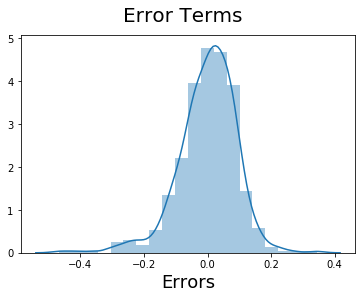

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- We can see the distribution is centered around zero.
- It is normally distributed.

### Making Predictions

In [67]:
# Apply transform (not fitting)
df_test[numerical_cols] = scalar.transform(df_test[numerical_cols])

### Dividing into X_test and y_test

In [68]:
X_test = df_test.drop(columns='cnt', axis=1)
y_test = df_test.cnt

In [69]:
# Creating new X_test dataframe by choosing columns same as during training model.
X_test_rfe = X_test[X_train_rfe.columns]

In [70]:
# Adding constant variable
X_test_rfe = sm.add_constant(X_test_rfe)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

### Model Evaluation

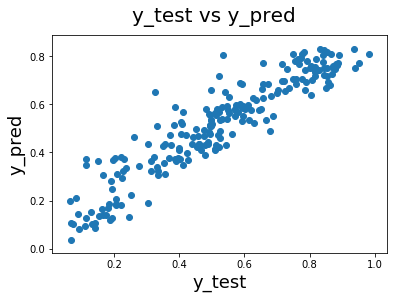

In [72]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

- The above graph shows the `y_pred` values are pretty much close to the `y_test` values. Hence, model has been trained well.

### Top Predictors Model

Let's list down the top predicting features of the model

In [73]:
model_smry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.04e-173
Time:                        22:59:53   Log-Likelihood:                 489.76
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     496   BIC:                            -892.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3182      0.025     12.657      0.000       0.269       0.368
yr                  0.2291      0.008     27.176      0.000       0.213       0.246
temp                0.3583      0.032     11.152      0.000       0.295       0.421
windspeed          -0.1075      0.023     -4.719      0.000      -0.152      -0.063
spring             -0.0974      0.019     -5.171      0.000      -0.134      -0.060
winter              0.0585      0.015      3.988      0.000       0.030       0.087
Dec                -0.0630      0.019     -3.328      0.001      -0.100      -0.026
Feb                -0.0524      0.022     -2.374      0.018      -0.096      -0.009
Jan                -0.0734      0.022     -3.333      0.001      -0.117      -0.030
Jul                -0.0590      0.018     -3.301      0.001      -0.094      -0.024
Nov                -0.0753      0.020     -3.728      0.000      -0.115      -0.036
Sep                 0.0436      0.016      2.651      0.008       0.011       0.076
light snow rain    -0.2602      0.028     -9.141      0.000      -0.316      -0.204
mist & cloudy      -0.0726      0.009     -8.024      0.000      -0.090      -0.055
==============================================================================
Omnibus:                       89.752   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.969
Skew:                          -0.864   Prob(JB):                     2.87e-53
Kurtosis:                       5.898   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the summary we can get the top predictor variables

- temp `(coeff ~ 0.3583)`
- light snow rain `(coeff ~ -0.2602)`
- yr `(coeff ~ 0.2291)`
- windspeed `(coeff ~ -0.1075)`
- spring `(coeff ~ -0.0974)`